In [ ]:
%%capture

!pip install stable_baselines3
!pip install swig
!pip install gymnasium[box2d]

# Treinamento de Agente com DQN no LunarLander-v2

Este notebook demonstra o treinamento de um agente para solucionar o ambiente `LunarLander-v2` do Gymnasium utilizando Deep Q-Network (DQN) fornecido pela biblioteca Stable Baselines 3. Abordaremos cada passo do processo, desde a configuração do ambiente até a avaliação do agente treinado.

## Importings

In [ ]:
# Importação de bibliotecas necessárias
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

## Escolha do Algoritmo: DQN em vez de Q-Learning Tradicional

A decisão de utilizar o algoritmo Deep Q-Network (DQN) em vez do Q-learning tradicional é baseada em várias considerações importantes relacionadas ao ambiente `LunarLander-v2` e à natureza do aprendizado por reforço profundo.

- **Capacidade de Generalização:** DQN utiliza redes neurais profundas para aproximar a função Q, permitindo que ele generalize melhor a partir de estados observados para aqueles não observados. Isso é particularmente útil em ambientes complexos como o `LunarLander-v2`, onde o espaço de estado é contínuo e de alta dimensão.

- **Estabilidade e Convergência:** O DQN introduz técnicas como a experiência de replay e target networks para melhorar a estabilidade e a convergência do treinamento. Essas técnicas ajudam a mitigar os problemas associados à correlação sequencial dos estados e à não estacionariedade dos alvos no aprendizado por reforço.

- **Desempenho Superior:** Empiricamente, o DQN tem demonstrado desempenho superior em uma ampla gama de tarefas de decisão sequencial comparado ao Q-learning tradicional, especialmente em ambientes com espaços de estado e ação complexos.


## Vantagens do Stable Baselines 3

Stable Baselines 3 é uma biblioteca que fornece implementações de alta qualidade e eficientes de algoritmos de aprendizado por reforço (RL). Seguem abaixo alguns dos motivos da escolha da biblioteca:

- **Facilidade de Uso:** Stable Baselines 3 oferece um modo de uso simples e intuitivo, tornando mais fácil configurar, treinar e avaliar os agentes.

- **Compatibilidade:** A biblioteca foi construída sobre o PyTorch, uma das principais frameworks de aprendizado profundo. Isso não só garante a eficiência e a otimização do treinamento, mas também facilita a integração com outras ferramentas e bibliotecas do ecossistema PyTorch.

- **Implementações de Referência:** As implementações dos algoritmos no Stable Baselines 3 são consideradas referência para a comunidade do RL, o que significa que podem ser usadas como benchmark para comparação e avaliação de novos métodos ou modelos.

- **Documentação e Comunidade:** A biblioteca possui uma documentação abrangente e uma comunidade ativa, o que facilita o aprendizado e a resolução de problemas.

Utilizando o Stable Baselines 3, é possível garantir uma aplicação das melhores práticas e técnicas mais recentes no treinamento dos agentes de RL.


## Classe CustomCallback

In [ ]:
class CustomCallback(BaseCallback):
    """
    Callback personalizado para monitorar a recompensa total por episódio durante o treinamento de um agente de aprendizado por reforço.

    Esse callback é projetado para ser usado com o processo de treinamento do Stable Baselines3. Ele acumula recompensas recebidas
    em cada passo e anexa a soma total a uma lista global cada vez que um episódio é concluído. Isso permite rastrear
    o desempenho do agente ao longo do tempo.

    Atributos:
        verbose (int): O nível de verbosidade: 0 para sem saída, 1 para saída mínima.
        sum_rewards (float): Soma de recompensas acumuladas durante o episódio atual.
    """
    def __init__(self, verbose=0):
        """
        Inicializa a instância CustomCallback.

        Parâmetros:
            verbose (int): O nível de verbosidade.
        """
        super(CustomCallback, self).__init__(verbose)
        self.sum_rewards = 0  # Inicializa a soma das recompensas.

    def _on_step(self) -> bool:
        """
        Esse método é chamado pelo ambiente de treinamento a cada passo.

        Ele acumula as recompensas recebidas em cada passo. Se o episódio terminou, ele anexa a soma total de recompensas
        do episódio à lista global e zera a soma de recompensas para o próximo episódio.

        Retorna:
            bool: True se o callback deve continuar, False caso contrário. Essa implementação sempre retorna True.
        """
        self.sum_rewards += self.locals['rewards'][0]  # Recompensas sendo acumuladas.

        if self.locals['dones'][0]:  # Verificação -> Episódio terminou?.
            rewardList.append(self.sum_rewards)  # Incrementa a recompensa do episódio na lista global.
            self.sum_rewards = 0  # Zera as recompensas do episódio pra iniciar o próximo.
        return True

## Configurando o ambiente e inicializando o modelo

In [ ]:
def create_environment():
    """
    Cria e retorna uma instância do ambiente 'LunarLander-v2' do Gymnasium.

    O ambiente 'LunarLander-v2' é um problema de controle onde o objetivo é pousar uma nave espacial em uma plataforma.
    Esse método facilita a criação do ambiente, encapsulando a chamada necessária à biblioteca gymnasium.

    Retorna:
        gym.Env: Uma instância do ambiente LunarLander-v2.
    """
    return gym.make('LunarLander-v2')

def initialize_model(env):
    """
    Inicializa e retorna um modelo DQN configurado para o ambiente fornecido.

    O modelo utiliza a política 'MlpPolicy' e é configurado com um conjunto específico de hiperparâmetros.
    Essa função abstrai a complexidade da criação e configuração do modelo DQN.

    Parâmetros:
        env (gym.Env): O ambiente do Gymnasium para o qual o modelo será inicializado.

    Retorna:
        DQN: Uma instância do modelo DQN configurada para o ambiente.
    """
    return DQN("MlpPolicy", env, learning_rate=1e-3, batch_size=64, buffer_size=100000, learning_starts=1000, verbose=1)

def train_model(model, callback, total_timesteps=50000):
    """
    Treina o modelo DQN fornecido por um número total de passos de tempo.

    A função realiza o treinamento do modelo utilizando os dados do ambiente e registra o progresso
    utilizando o callback fornecido. A frequência do log é configurada para cada 100 passos.

    Parâmetros:
        model (DQN): O modelo DQN a ser treinado.
        callback (BaseCallback): Um callback do Stable Baselines3 para monitorar o treinamento.
        total_timesteps (int): O número total de passos de tempo para treinar o modelo.

    Retorna:
        DQN: O modelo DQN após o treinamento.
    """
    model.learn(total_timesteps=total_timesteps, callback=callback, log_interval=100)
    return model

## Treinando o modelo

In [ ]:
# Inicialização da lista para armazenamento das recompensas totais por episódio.
# Essa lista será utilizada para armazenar as somas das recompensas que o agente recebe em cada episódio,
# permitindo uma análise posterior do desempenho do agente ao longo do tempo.
rewardList = []

# Criação de uma instância de CustomCallback.
# O CustomCallback é utilizado durante o treinamento do modelo para executar ações customizadas em cada passo,
# como acumular recompensas e adicionar a soma das recompensas por episódio à lista rewardList.
# Isso permite o monitoramento do progresso do treinamento em termos de recompensa total acumulada por episódio.
callback = CustomCallback()

# Criação do ambiente Gymnasium 'LunarLander-v2'.
# Esse ambiente simula o pouso de uma nave espacial, onde o objetivo é pousar na plataforma de forma segura.
# A função gym.make é utilizada para criar uma instância do ambiente, baseada no nome 'LunarLander-v2'.
env = gym.make('LunarLander-v2')

# Inicialização do modelo DQN utilizando a função initialize_model, que foi previamente documentada.
# A função recebe o ambiente criado e retorna um modelo DQN configurado com uma política 'MlpPolicy' e
# hiperparâmetros específicos. Esse modelo será utilizado para aprender a navegar no ambiente 'LunarLander-v2'.
model = initialize_model(env)

# Treinamento do modelo DQN utilizando a função train_model, que também foi previamente documentada.
# A função train_model recebe o modelo, o callback criado, e o número total de passos de tempo para o treinamento,
# que nesse caso é especificado como 1000000. Essa função irá treinar o modelo no ambiente, utilizando o callback
# para monitorar o progresso e armazenar as recompensas por episódio.
train_model(model, callback, 1000000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97       |
|    ep_rew_mean      | -186     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 718      |
|    time_elapsed     | 13       |
|    total_timesteps  | 9703     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.175    |
|    n_updates        | 2175     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | -132     |
|    exploration_rate | 0.804    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 760      |
|    time_elapsed     | 27       |
|    total_timesteps  | 20674    |
| train/              |        

## Avaliando o desempenho

In [ ]:
# Avaliação do desempenho do agente
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

# Impressão dos resultados da avaliação
print(f"Média das recompensas: {mean_reward}, Desvio padrão das recompensas: {std_reward}")

Média das recompensas: 240.37032330000002, Desvio padrão das recompensas: 62.10345289205022


## Visualizando o desempenho

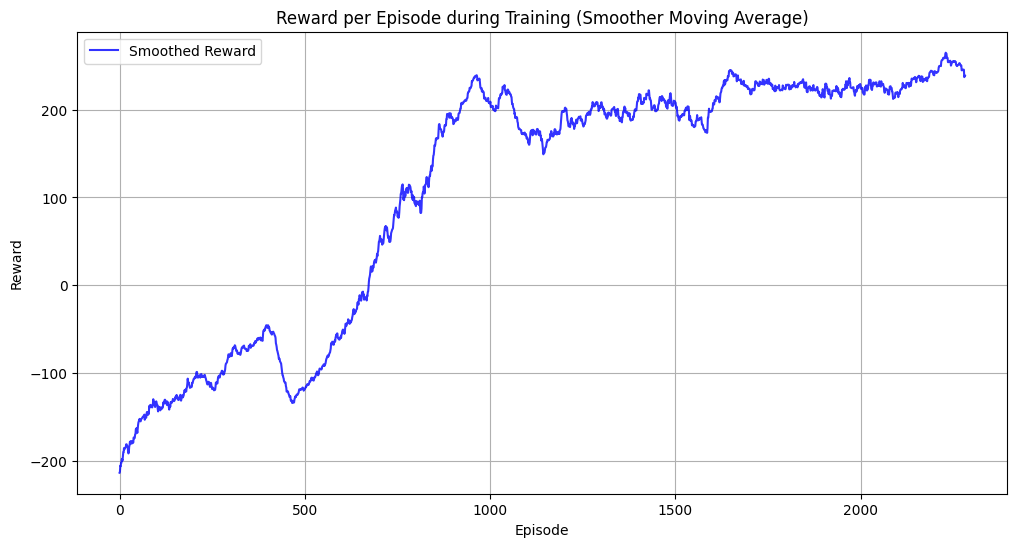

In [ ]:
# Função para suavizar a curva usando uma média móvel com uma janela maior
def smoother_moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))

# Suavizando a curva com média móvel com uma janela maior
smoothed_rewards = smoother_moving_average(rewardList, window_size=50)
plt.plot(smoothed_rewards, label='Smoothed Reward', color='blue', alpha=0.8)

# Estilizando o gráfico
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per Episode during Training (Smoother Moving Average)')
plt.grid(True)
plt.legend()
plt.show()


## Considerações Finais

Este notebook apresentou o processo de treinamento e avaliação de um agente DQN no ambiente `LunarLander-v2`. Ao longo do treinamento, observamos a evolução do desempenho do agente, evidenciado pela recompensa total por episódio.